In [1]:

import pandas as pd

from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data = load_boston()

df_X = pd.DataFrame(data['data'], columns=data['feature_names'])
df_Y = pd.Series(data['target'])

df_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df_Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [5]:
df_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


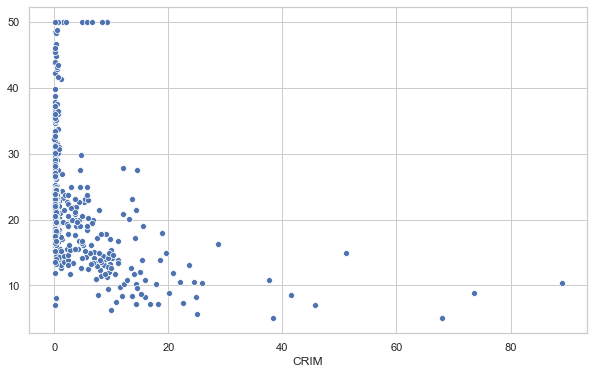

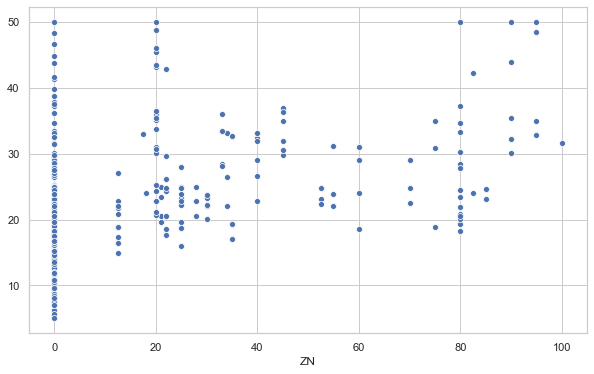

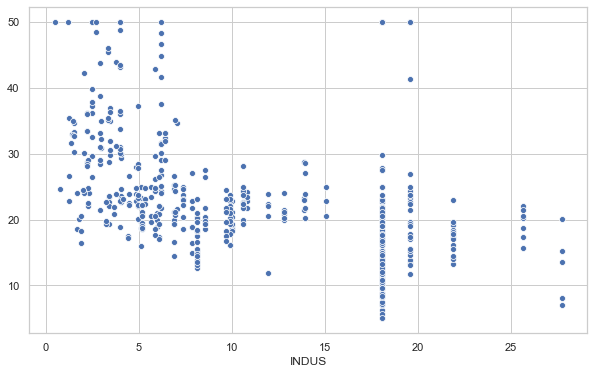

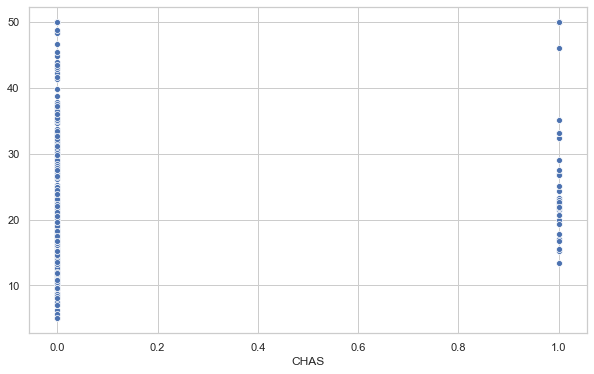

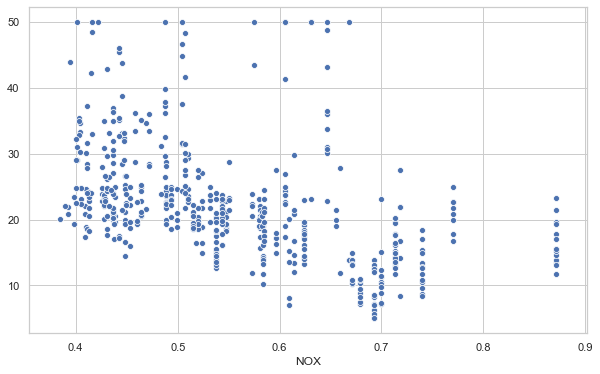

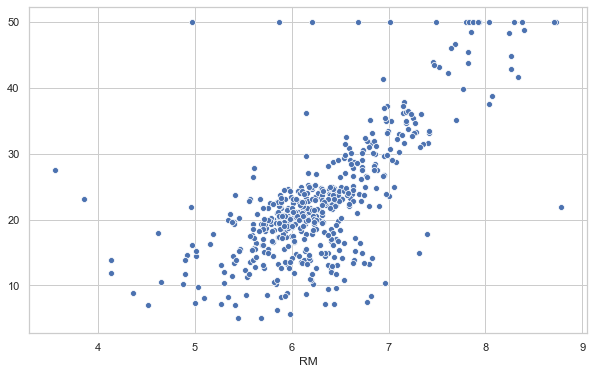

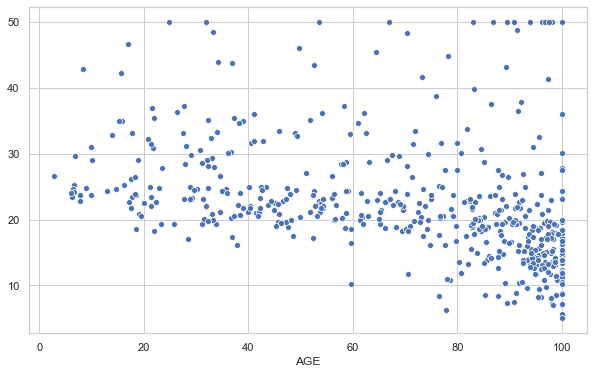

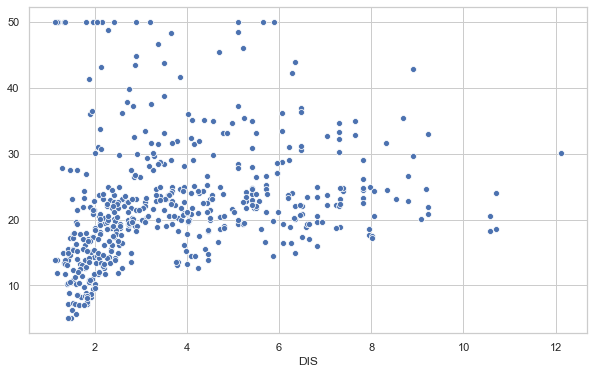

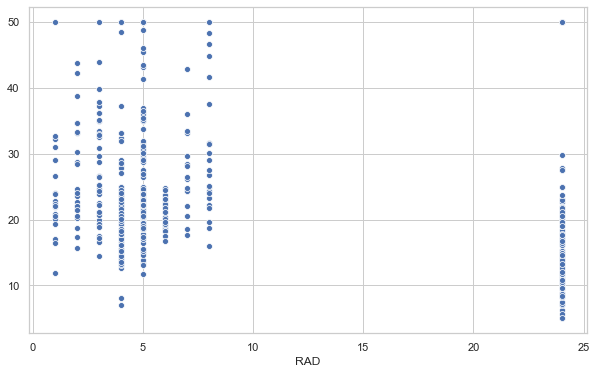

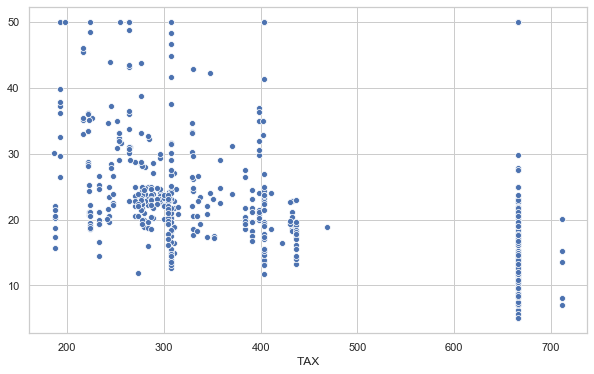

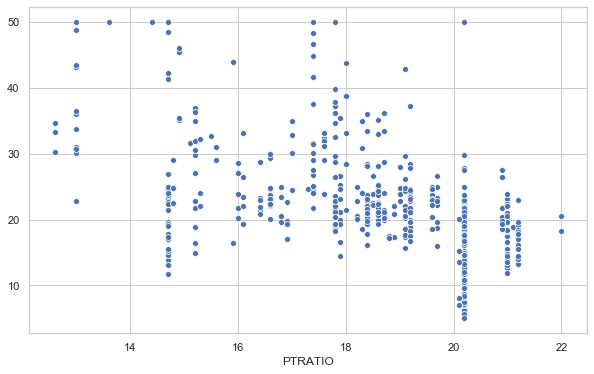

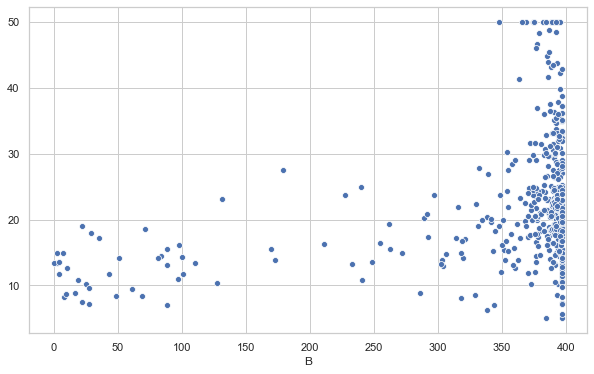

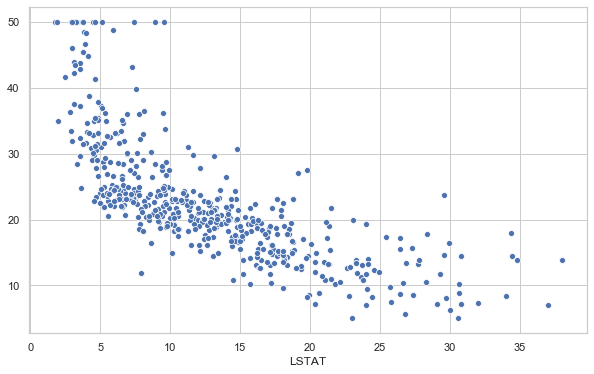

In [7]:
sns.set(style='whitegrid')
# plt.legend()

# plt.title("trigonometric functions")

for col in df_X.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(df_X[col], df_Y)
    plt.show()
# plt.savefig('../data/images/tfs.png')



In [29]:
from sklearn.linear_model import LinearRegression

X = df_X['RM'].values.reshape(-1,1)
y = df_Y.values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
from sklearn.base import BaseEstimator, RegressorMixin

class OurLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.model = LinearRegression()
    
    def fit(self, X=None, y=None):
        x = np.array([[4], [9]])
        y = np.array([[50], [0]])
        self.model.fit(x, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)

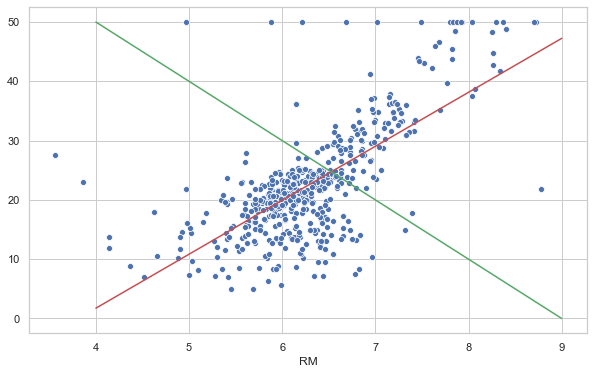

In [50]:
lr = OurLinearRegression()
lr.fit()

x = np.array([[4], [9]])
y2 = lr.predict(x)

model.predict(x)

plt.figure(figsize=(10,6))
sns.scatterplot(df_X['RM'], df_Y)
plt.plot(x, model.predict(x), 'r')
plt.plot(x, lr.predict(x), 'g')
plt.show()

In [51]:
values = cross_val_score(LinearRegression(), X, y, cv=3, n_jobs=3, scoring='r2')
print(values)
values.mean()

[ 0.68437127  0.20579461 -0.74116176]


0.0496680382171486

In [52]:
values = cross_val_score(OurLinearRegression(), X, y, cv=3, n_jobs=3, scoring='r2')
print(values)
values.mean()

[-2.7825706  -2.56159108 -3.31941341]


-2.887858361194649

In [53]:
model = LinearRegression()
model.fit(df_X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
values = cross_val_score(LinearRegression(), df_X, y, cv=10, n_jobs=3, scoring='r2')
print(values)
values.mean()

[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]


0.2025289900605541

In [55]:
from sklearn.tree import DecisionTreeRegressor


In [67]:
# model = DecisionTreeRegressor()
values = cross_val_score(DecisionTreeRegressor(), df_X[['RM', 'LSTAT', 'CRIM', 'NOX']], y, cv=10, n_jobs=-1, scoring='r2')
print(values)
values.mean()

[ 0.52250738  0.60829908 -1.71205287  0.66291527  0.54847854  0.63804152
 -0.01674432  0.2601006  -3.06562171 -3.52719359]


-0.5081270094425597

In [58]:
model = DecisionTreeRegressor()
model.fit(df_X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [61]:
for c, v in zip(df_X.columns, model.feature_importances_):
    print(c, f'{v:.3f}')

CRIM 0.050
ZN 0.001
INDUS 0.002
CHAS 0.001
NOX 0.049
RM 0.578
AGE 0.013
DIS 0.074
RAD 0.002
TAX 0.014
PTRATIO 0.007
B 0.006
LSTAT 0.204


In [69]:
from sklearn.ensemble import RandomForestRegressor

values = cross_val_score(RandomForestRegressor(n_estimators=100), df_X, y, cv=10, n_jobs=-1, scoring='r2')
print(values)
values.mean()

[ 0.71813018  0.81177208  0.38394508  0.78822194  0.8435264   0.74711054
  0.54356279  0.35086407 -0.51260481  0.21989151]


0.48944197828864294

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit([[77.6], [90]], [10, 40])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
model.predict([[86]])

array([30.32258065])